# **Agriculture Crop Yield**




My dataset focuses on agriculture crop yield prediction, containing features related to environmental, geographical, and agricultural factors that influence crop production.

The dataset likely includes:

Numerical Features: Weather data (e.g., temperature, rainfall), soil properties, and yield measurements.

Categorical Features: Crop type, region, and farming practices.

Target Variable: Crop yield, representing the amount of produce (e.g., in tons/hectare).

#Features
Rainfall: Annual precipitation in the region.

Temperature: Average temperature influencing crops.

Soil Type: Classification of soil properties.

Region: Geographic area of cultivation.

Crop Type: Specific crop being grown.

Yield: Total production per hectare.

# Preprocessing


In [ ]:
import pandas as pd
import numpy as np

file_path = "/content/crop_yield.csv"
data = pd.read_csv(file_path)

print("Dataset Shape:", data.shape)
print(data.info())
print(data.head())


Dataset Shape: (101031, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101031 entries, 0 to 101030
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  101031 non-null  object 
 1   Soil_Type               101031 non-null  object 
 2   Crop                    101031 non-null  object 
 3   Rainfall_mm             101031 non-null  float64
 4   Temperature_Celsius     101031 non-null  float64
 5   Fertilizer_Used         101031 non-null  bool   
 6   Irrigation_Used         101031 non-null  bool   
 7   Weather_Condition       101031 non-null  object 
 8   Days_to_Harvest         101031 non-null  int64  
 9   Yield_tons_per_hectare  101031 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 6.4+ MB
None
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  Sout

In [ ]:
data.dropna(inplace=True)

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Region', 'Soil_Type', 'Crop', 'Weather_Condition'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

target_column = 'Yield_tons_per_hectare'
features = data.drop(columns=[target_column])
target = data[target_column]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = features.select_dtypes(include=['int64', 'float64']).columns
features[numerical_columns] = scaler.fit_transform(features[numerical_columns])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.9138197392562253
Mean Squared Error: 0.25123644196564093
Root Mean Squared Error: 0.5012349169457779
Mean Absolute Error: 0.3995016744380627


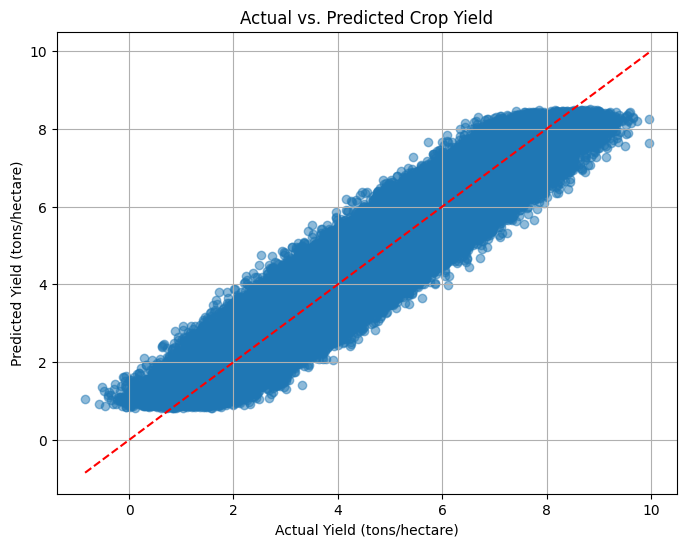

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values
plt.xlabel("Actual Yield (tons/hectare)")
plt.ylabel("Predicted Yield (tons/hectare)")
plt.title("Actual vs. Predicted Crop Yield")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Lasso and Ridge
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Create Lasso and Ridge models
lasso = Lasso()
ridge = Ridge()

# Perform GridSearchCV for Lasso
lasso_grid = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error') # Use 5-fold cross-validation
lasso_grid.fit(X_train, y_train)
print(f"Best Lasso parameters: {lasso_grid.best_params_}")
print(f"Best Lasso score: {lasso_grid.best_score_}")

# Perform GridSearchCV for Ridge
ridge_grid = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error') # Use 5-fold cross-validation
ridge_grid.fit(X_train, y_train)
print(f"Best Ridge parameters: {ridge_grid.best_params_}")
print(f"Best Ridge score: {ridge_grid.best_score_}")


# Evaluate the best Lasso model
y_pred_lasso = lasso_grid.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"\nLasso - R-squared: {r2_lasso}")
print(f"Lasso - Mean Squared Error: {mse_lasso}")
print(f"Lasso - Root Mean Squared Error: {rmse_lasso}")
print(f"Lasso - Mean Absolute Error: {mae_lasso}")

# Evaluate the best Ridge model
y_pred_ridge = ridge_grid.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"\nRidge - R-squared: {r2_ridge}")
print(f"Ridge - Mean Squared Error: {mse_ridge}")
print(f"Ridge - Root Mean Squared Error: {rmse_ridge}")
print(f"Ridge - Mean Absolute Error: {mae_ridge}")

Best Lasso parameters: {'alpha': 0.001}
Best Lasso score: -0.25033899272228244
Best Ridge parameters: {'alpha': 0.001}
Best Ridge score: -0.25033904738872026

Lasso - R-squared: 0.9138168148681354
Lasso - Mean Squared Error: 0.25124496726891005
Lasso - Root Mean Squared Error: 0.5012434211726974
Lasso - Mean Absolute Error: 0.39952713709180804

Ridge - R-squared: 0.913819739217207
Ridge - Mean Squared Error: 0.25123644207938883
Ridge - Root Mean Squared Error: 0.5012349170592456
Ridge - Mean Absolute Error: 0.3995016748240212


In [ ]:
import pandas as pd

data = {'Model': ['Lasso', 'Ridge'],
        'Train MSE': [lasso_grid.best_score_*-1, ridge_grid.best_score_*-1],
        'Test MSE': [mse_lasso, mse_ridge],
        'Train R-squared': [r2_lasso,r2_ridge],
        'Test R-squared': [r2_lasso, r2_ridge]}
df = pd.DataFrame(data)
df

,Model,Train MSE,Test MSE,Train R-squared,Test R-squared
0,Lasso,0.250339,0.251245,0.913817,0.913817
1,Ridge,0.250339,0.251236,0.913820,0.913820


                         Train Error  Test Error
R-squared                   0.913158    0.913718
Mean Squared Error          0.249422    0.249189
Root Mean Squared Error     0.499421    0.499188
Mean Absolute Error         0.398316    0.398232


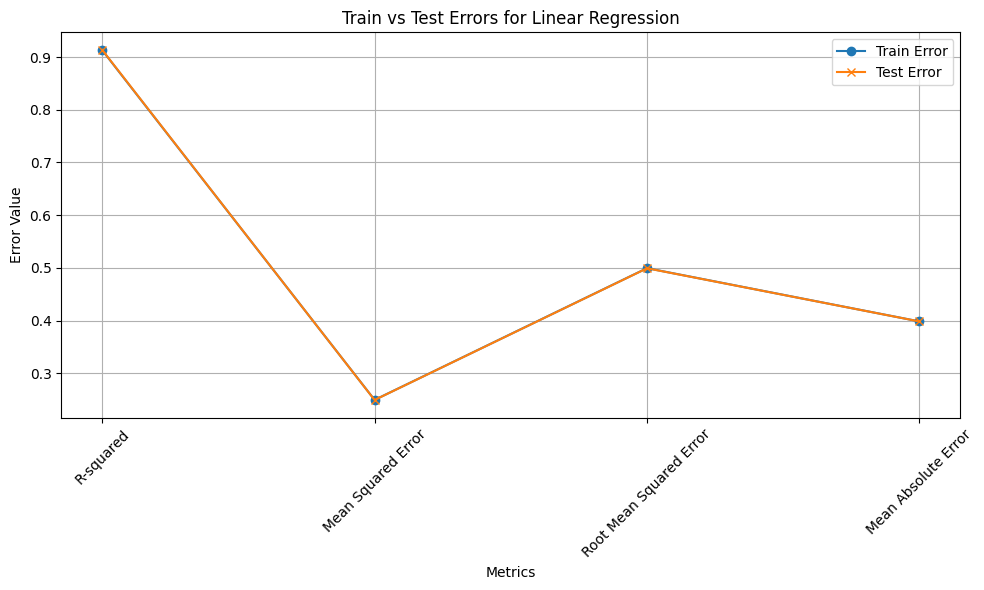

In [ ]:
# prompt: linear regression train errors vs test errors for all the four metrices

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate errors for training data
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Store the errors in a dictionary
train_errors = {
    "R-squared": r2_train,
    "Mean Squared Error": mse_train,
    "Root Mean Squared Error": rmse_train,
    "Mean Absolute Error": mae_train
}
test_errors = {
    "R-squared": r2,
    "Mean Squared Error": mse,
    "Root Mean Squared Error": rmse,
    "Mean Absolute Error": mae
}

# Create a DataFrame for better visualization
errors_df = pd.DataFrame({"Train Error": train_errors, "Test Error": test_errors})

# Display the table
print(errors_df)

# Plotting the errors
metrics = ["R-squared", "Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error"]
plt.figure(figsize=(10, 6))
plt.plot(metrics, errors_df["Train Error"], label="Train Error", marker='o')
plt.plot(metrics, errors_df["Test Error"], label="Test Error", marker='x')
plt.xlabel("Metrics")
plt.ylabel("Error Value")
plt.title("Train vs Test Errors for Linear Regression")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() # Prevents labels from overlapping
plt.show()

In [ ]:
# Train Error Calculation
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Create a table
data = {'Metric': ['R-squared', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error'],
        'Train Error': [r2_train, mse_train, rmse_train, mae_train],
        'Test Error': [r2, mse, rmse, mae]}
df = pd.DataFrame(data)
df

,Metric,Train Error,Test Error
0,R-squared,0.912969,0.913015
1,Mean Squared Error,0.250407,0.250772
2,Root Mean Squared Error,0.500407,0.500771
3,Mean Absolute Error,0.399252,0.399552


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
import math
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = math.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Mean Squared Error: {mse_knn}")
print(f"KNN Root Mean Squared Error: {rmse_knn}")
print(f"KNN Mean Absolute Error: {mae_knn}")
print(f"KNN R-squared: {r2_knn}")

KNN Mean Squared Error: 0.3527831117296754
KNN Root Mean Squared Error: 0.5939554795855287
KNN Mean Absolute Error: 0.4732072510021887
KNN R-squared: 0.8789867412665336


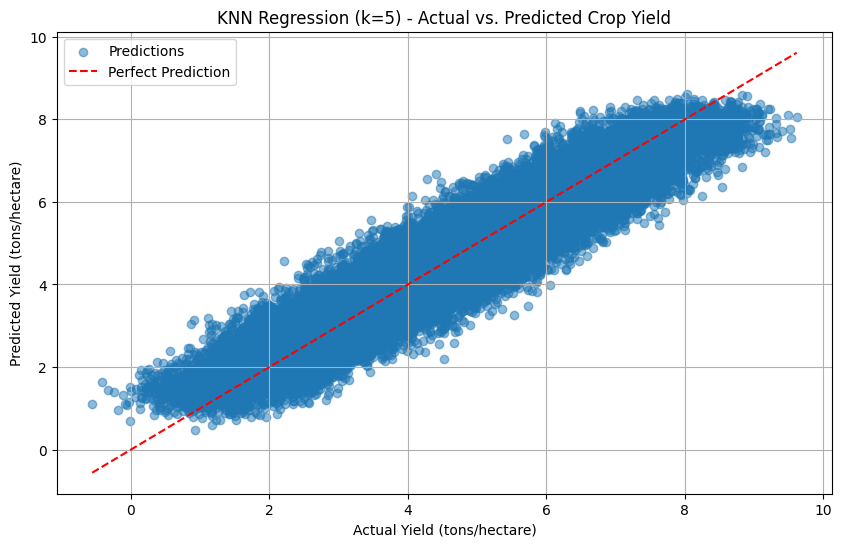

In [ ]:

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

def visualize_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_knn, alpha=0.5, label='Predictions')
    plt.xlabel("Actual Yield (tons/hectare)")
    plt.ylabel("Predicted Yield (tons/hectare)")
    plt.title(f"KNN Regression (k={n_neighbors}) - Actual vs. Predicted Crop Yield")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    if X_train.shape[1] == 2:
        plt.figure(figsize=(10, 6))
        x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
        y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, alpha=0.8, label='Training Data')
        plt.xlabel(X_train.columns[0])
        plt.ylabel(X_train.columns[1])
        plt.title(f'KNN Decision Boundary (k={n_neighbors})')
        plt.legend()
        plt.show()

visualize_knn(X_train, X_test, y_train, y_test)

In [ ]:
param_grid_knn = {'n_neighbors': list(range(1,31))}

# Create KNN model
knn = KNeighborsRegressor()

# Perform GridSearchCV for KNN
knn_grid = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)

print(f"Best KNN parameters: {knn_grid.best_params_}")
print(f"Best KNN score: {knn_grid.best_score_}")

# Evaluate the best KNN model
y_pred_knn = knn_grid.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)


print(f"\nKNN - R-squared: {r2_knn}")
print(f"KNN - Mean Squared Error: {mse_knn}")

# Train Error Calculation for KNN
y_train_pred_knn = knn_grid.predict(X_train)
r2_train_knn = r2_score(y_train, y_train_pred_knn)
mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)

# Create a table
data = {'Model': ['Lasso', 'Ridge', 'KNN'],
        'Train MSE': [lasso_grid.best_score_*-1, ridge_grid.best_score_*-1, mse_train_knn],
        'Test MSE': [mse_lasso, mse_ridge, mse_knn],
        'Train R-squared': [r2_train, r2_train, r2_train_knn],
        'Test R-squared': [r2_lasso, r2_ridge, r2_knn]}
df = pd.DataFrame(data)
df

Best KNN parameters: {'n_neighbors': 17}
Best KNN score: -0.32045929558072145

KNN - R-squared: 0.8923624430686236
KNN - Mean Squared Error: 0.3137896844581846


NameError: name 'r2_train' is not defined

                         Train Error  Test Error
R-squared                   0.921846    0.883140
Mean Squared Error          0.224468    0.337500
Root Mean Squared Error     0.473781    0.580948
Mean Absolute Error         0.378235    0.463938


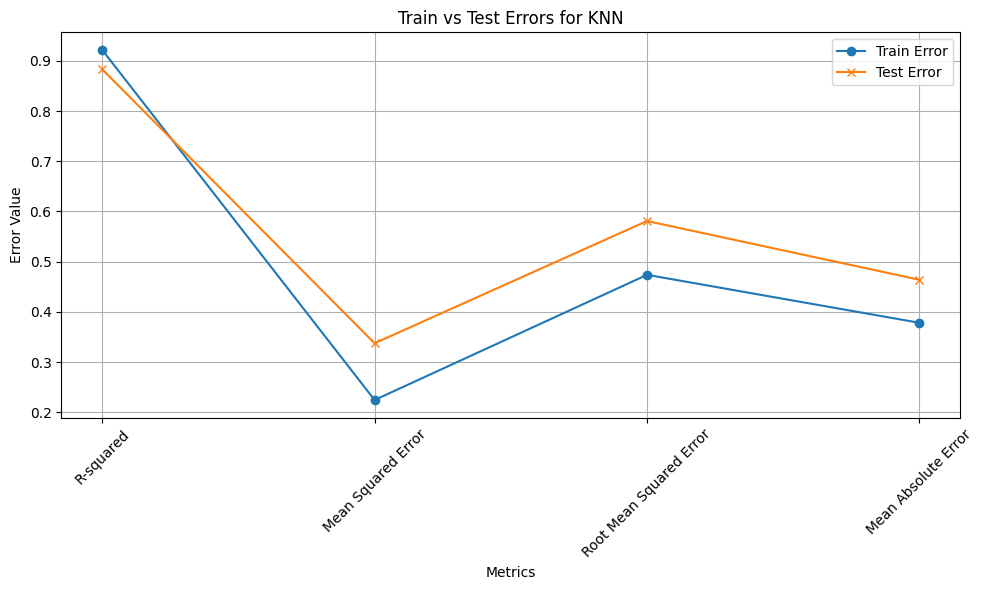

In [ ]:
# prompt: linear regression train errors vs test errors for all the four metrices

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate errors for training data
y_train_pred = knn_model.predict(X_train)
r2_knn_train = r2_score(y_train, y_train_pred)
mse_knn_train = mean_squared_error(y_train, y_train_pred)
rmse_knn_train = np.sqrt(mse_knn_train)
mae_knn_train = mean_absolute_error(y_train, y_train_pred)

# Store the errors in a dictionary
train_errors = {
    "R-squared": r2_knn_train,
    "Mean Squared Error": mse_knn_train,
    "Root Mean Squared Error": rmse_knn_train,
    "Mean Absolute Error": mae_knn_train
}
test_errors = {
    "R-squared": r2_knn,
    "Mean Squared Error": mse_knn,
    "Root Mean Squared Error": rmse_knn,
    "Mean Absolute Error": mae_knn
}

# Create a DataFrame for better visualization
errors_df = pd.DataFrame({"Train Error": train_errors, "Test Error": test_errors})

# Display the table
print(errors_df)

# Plotting the errors
metrics = ["R-squared", "Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error"]
plt.figure(figsize=(10, 6))
plt.plot(metrics, errors_df["Train Error"], label="Train Error", marker='o')
plt.plot(metrics, errors_df["Test Error"], label="Test Error", marker='x')
plt.xlabel("Metrics")
plt.ylabel("Error Value")
plt.title("Train vs Test Errors for KNN")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() # Prevents labels from overlapping
plt.show()

# Decision tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = math.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree Root Mean Squared Error: {rmse_dt}")
print(f"Decision Tree Mean Absolute Error: {mae_dt}")
print(f"Decision Tree R-squared: {r2_dt}")



Decision Tree Mean Squared Error: 0.2597724363619793
Decision Tree Root Mean Squared Error: 0.5096787580054511
Decision Tree Mean Absolute Error: 0.4065077393353025
Decision Tree R-squared: 0.9100537174818991


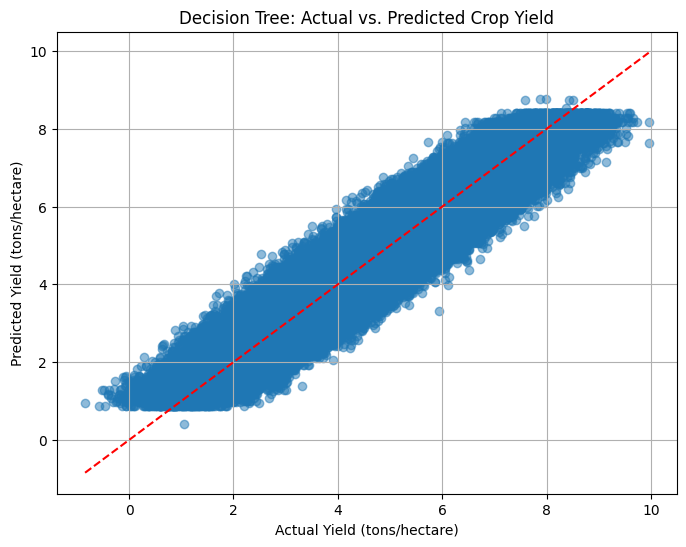

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.xlabel("Actual Yield (tons/hectare)")
plt.ylabel("Predicted Yield (tons/hectare)")
plt.title("Decision Tree: Actual vs. Predicted Crop Yield")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

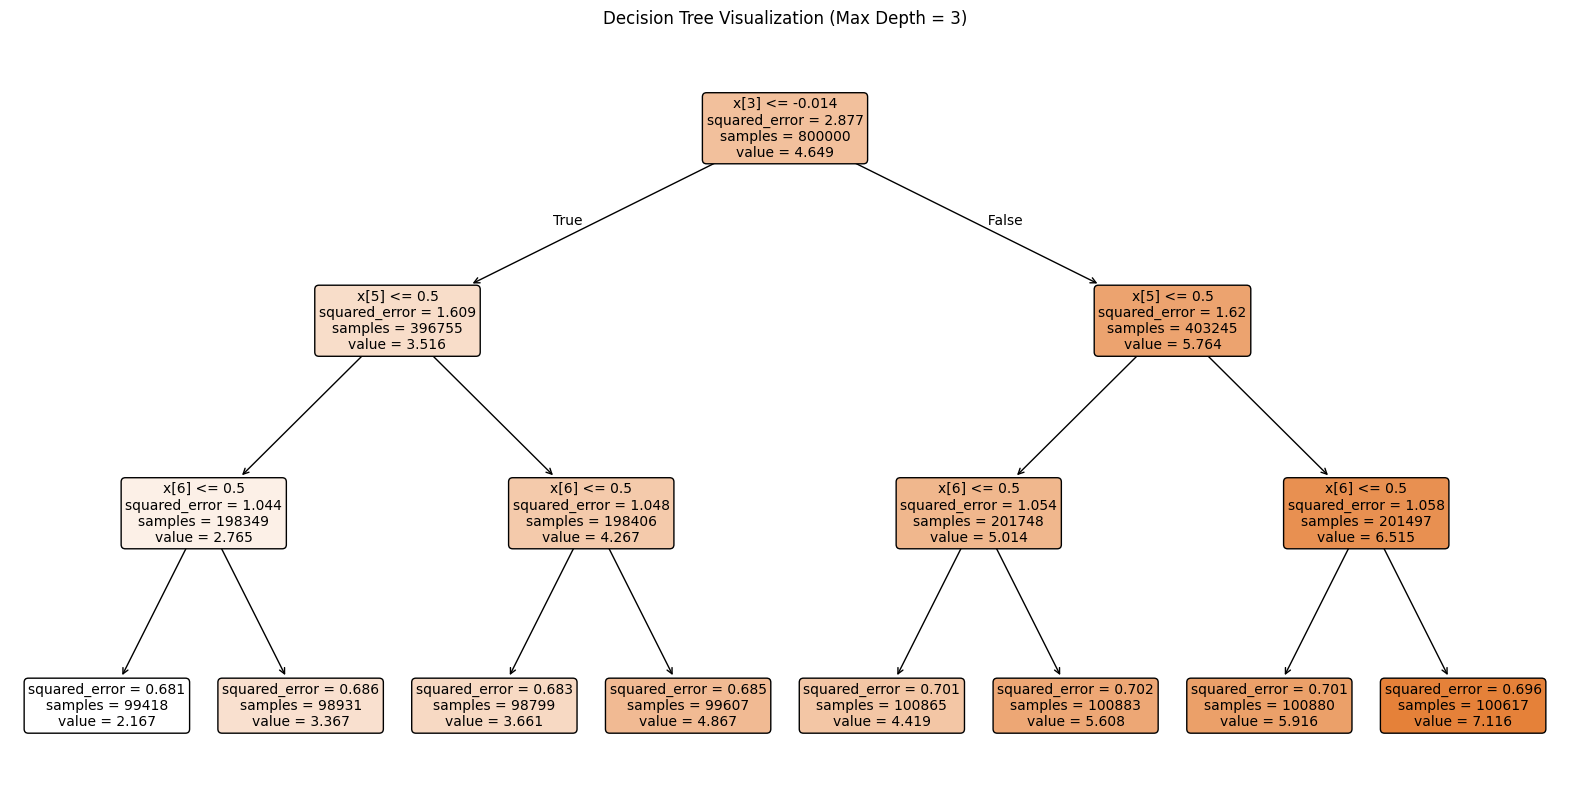

In [ ]:
from sklearn.tree import plot_tree

dt_model_viz = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model_viz.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model_viz, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Max Depth = 3)")
plt.show()

                         Train Error  Test Error
R-squared                   0.916172    0.910054
Mean Squared Error          0.240763    0.259772
Root Mean Squared Error     0.490676    0.509679
Mean Absolute Error         0.391061    0.406508


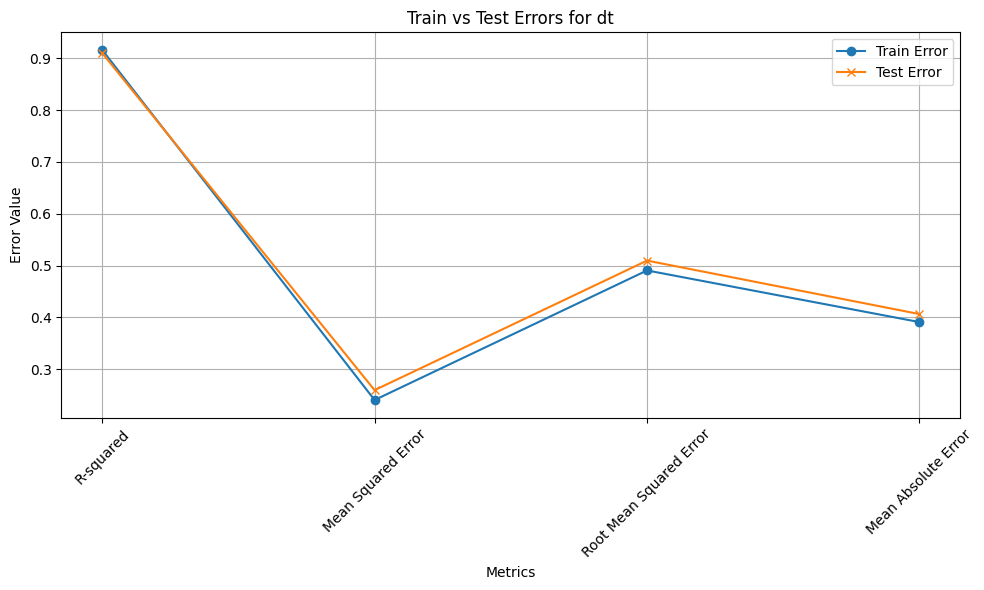

In [ ]:
# prompt: linear regression train errors vs test errors for all the four metrices

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate errors for training data
y_train_pred = dt_model.predict(X_train)
r2_dt_train = r2_score(y_train, y_train_pred)
mse_dt_train = mean_squared_error(y_train, y_train_pred)
rmse_dt_train = np.sqrt(mse_dt_train)
mae_dt_train = mean_absolute_error(y_train, y_train_pred)

# Store the errors in a dictionary
train_errors = {
    "R-squared": r2_dt_train,
    "Mean Squared Error": mse_dt_train,
    "Root Mean Squared Error": rmse_dt_train,
    "Mean Absolute Error": mae_dt_train
}
test_errors = {
    "R-squared": r2_dt,
    "Mean Squared Error": mse_dt,
    "Root Mean Squared Error": rmse_dt,
    "Mean Absolute Error": mae_dt
}

# Create a DataFrame for better visualization
errors_df = pd.DataFrame({"Train Error": train_errors, "Test Error": test_errors})

# Display the table
print(errors_df)

# Plotting the errors
metrics = ["R-squared", "Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error"]
plt.figure(figsize=(10, 6))
plt.plot(metrics, errors_df["Train Error"], label="Train Error", marker='o')
plt.plot(metrics, errors_df["Test Error"], label="Test Error", marker='x')
plt.xlabel("Metrics")
plt.ylabel("Error Value")
plt.title("Train vs Test Errors for dt")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() # Prevents labels from overlapping
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = math.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest Mean Absolute Error: {mae_rf}")
print(f"Random Forest R-squared: {r2_rf}")



Random Forest Mean Squared Error: 0.2688612006273367
Random Forest Root Mean Squared Error: 0.5185182741498477
Random Forest Mean Absolute Error: 0.41365351806616996
Random Forest R-squared: 0.9069067301810096


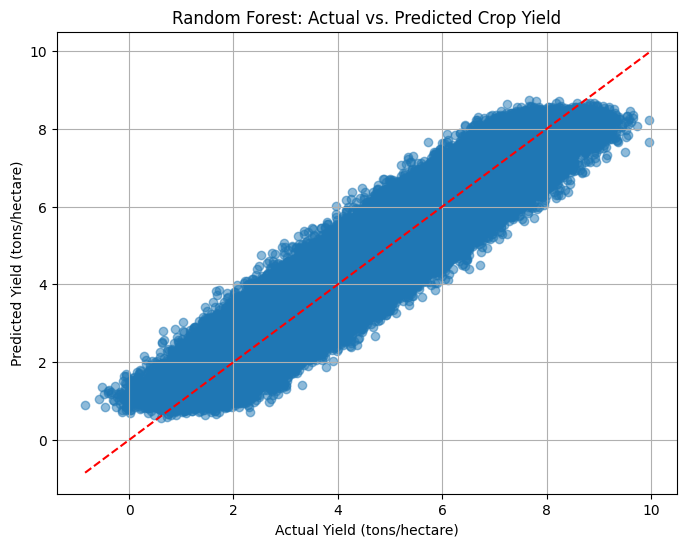

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Yield (tons/hectare)")
plt.ylabel("Predicted Yield (tons/hectare)")
plt.title("Random Forest: Actual vs. Predicted Crop Yield")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

                         Train Error  Test Error
R-squared                   0.986885    0.906907
Mean Squared Error          0.037668    0.268861
Root Mean Squared Error     0.194082    0.518518
Mean Absolute Error         0.153411    0.413654


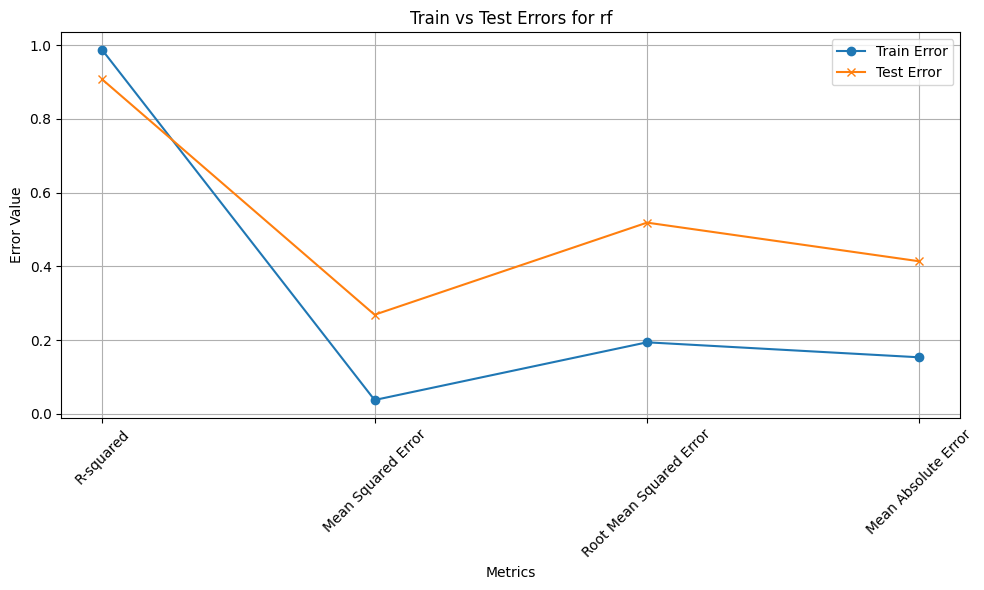

In [ ]:
# prompt: linear regression train errors vs test errors for all the four metrices

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate errors for training data
y_train_pred = rf_model.predict(X_train)
r2_rf_train = r2_score(y_train, y_train_pred)
mse_rf_train = mean_squared_error(y_train, y_train_pred)
rmse_rf_train = np.sqrt(mse_rf_train)
mae_rf_train = mean_absolute_error(y_train, y_train_pred)

# Store the errors in a dictionary
train_errors = {
    "R-squared": r2_rf_train,
    "Mean Squared Error": mse_rf_train,
    "Root Mean Squared Error": rmse_rf_train,
    "Mean Absolute Error": mae_rf_train
}
test_errors = {
    "R-squared": r2_rf,
    "Mean Squared Error": mse_rf,
    "Root Mean Squared Error": rmse_rf,
    "Mean Absolute Error": mae_rf
}

# Create a DataFrame for better visualization
errors_df = pd.DataFrame({"Train Error": train_errors, "Test Error": test_errors})

# Display the table
print(errors_df)

# Plotting the errors
metrics = ["R-squared", "Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error"]
plt.figure(figsize=(10, 6))
plt.plot(metrics, errors_df["Train Error"], label="Train Error", marker='o')
plt.plot(metrics, errors_df["Test Error"], label="Test Error", marker='x')
plt.xlabel("Metrics")
plt.ylabel("Error Value")
plt.title("Train vs Test Errors for rf")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() # Prevents labels from overlapping
plt.show()

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=3)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = math.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting Root Mean Squared Error: {rmse_gb}")
print(f"Gradient Boosting Mean Absolute Error: {mae_gb}")
print(f"Gradient Boosting R-squared: {r2_gb}")



Gradient Boosting Mean Squared Error: 0.25083524742249835
Gradient Boosting Root Mean Squared Error: 0.5008345509472149
Gradient Boosting Mean Absolute Error: 0.3995237651157973
Gradient Boosting R-squared: 0.9131482217816087


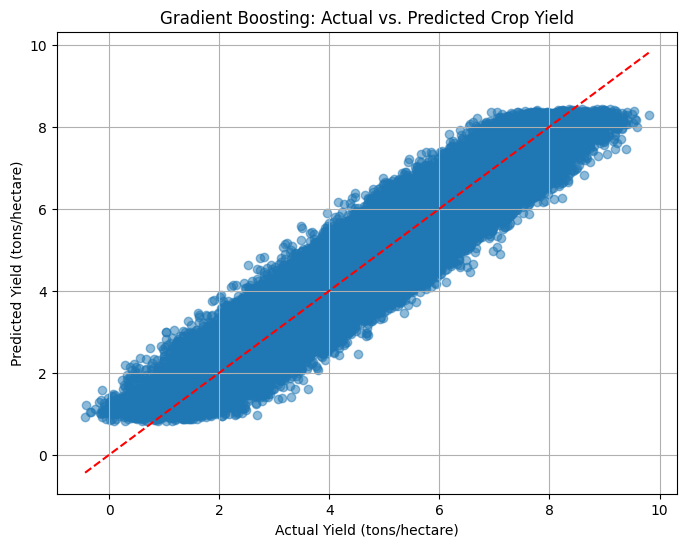

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel("Actual Yield (tons/hectare)")
plt.ylabel("Predicted Yield (tons/hectare)")
plt.title("Gradient Boosting: Actual vs. Predicted Crop Yield")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

                         Train Error  Test Error
R-squared                   0.913254    0.913148
Mean Squared Error          0.249145    0.250835
Root Mean Squared Error     0.499144    0.500835
Mean Absolute Error         0.398108    0.399524


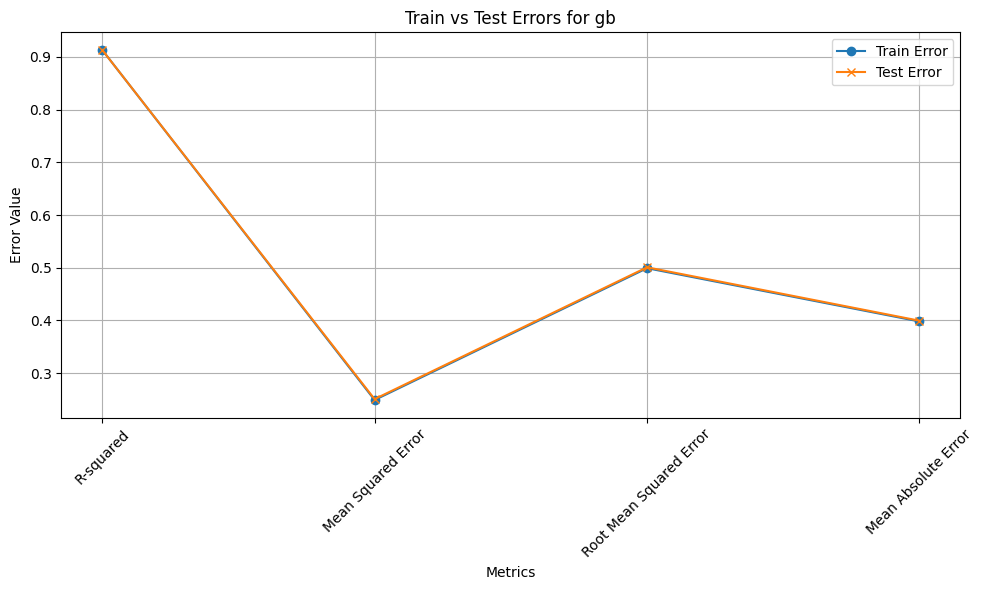

In [ ]:
# prompt: linear regression train errors vs test errors for all the four metrices

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate errors for training data
y_train_pred = gb_model.predict(X_train)
r2_gb_train = r2_score(y_train, y_train_pred)
mse_gb_train = mean_squared_error(y_train, y_train_pred)
rmse_gb_train = np.sqrt(mse_gb_train)
mae_gb_train = mean_absolute_error(y_train, y_train_pred)

# Store the errors in a dictionary
train_errors = {
    "R-squared": r2_gb_train,
    "Mean Squared Error": mse_gb_train,
    "Root Mean Squared Error": rmse_gb_train,
    "Mean Absolute Error": mae_gb_train
}
test_errors = {
    "R-squared": r2_gb,
    "Mean Squared Error": mse_gb,
    "Root Mean Squared Error": rmse_gb,
    "Mean Absolute Error": mae_gb
}

# Create a DataFrame for better visualization
errors_df = pd.DataFrame({"Train Error": train_errors, "Test Error": test_errors})

# Display the table
print(errors_df)

# Plotting the errors
metrics = ["R-squared", "Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error"]
plt.figure(figsize=(10, 6))
plt.plot(metrics, errors_df["Train Error"], label="Train Error", marker='o')
plt.plot(metrics, errors_df["Test Error"], label="Test Error", marker='x')
plt.xlabel("Metrics")
plt.ylabel("Error Value")
plt.title("Train vs Test Errors for gb")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() # Prevents labels from overlapping
plt.show()

# XG Boost


In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score, roc_curve, auc

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = math.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost Root Mean Squared Error: {rmse_xgb}")
print(f"XGBoost Mean Absolute Error: {mae_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")


XGBoost Mean Squared Error: 0.25440654124655837
XGBoost Root Mean Squared Error: 0.5043872929075022
XGBoost Mean Absolute Error: 0.40233054977169186
XGBoost R-squared: 0.911911660244316


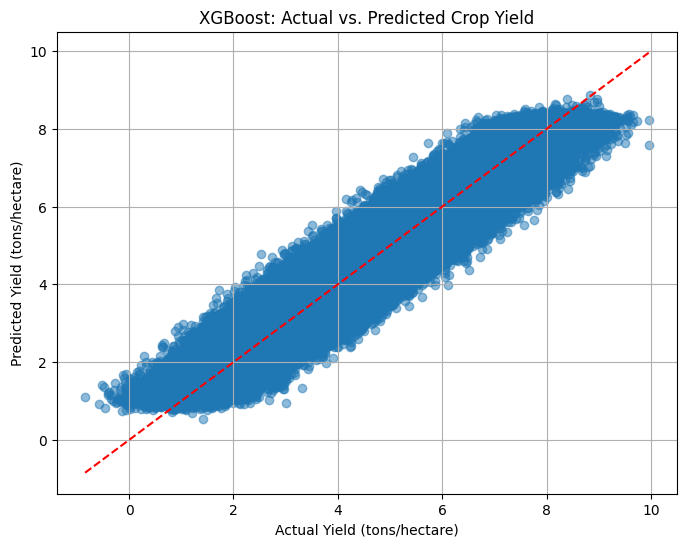

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Yield (tons/hectare)")
plt.ylabel("Predicted Yield (tons/hectare)")
plt.title("XGBoost: Actual vs. Predicted Crop Yield")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

                         Train Error  Test Error
R-squared                   0.918911    0.911912
Mean Squared Error          0.232896    0.254407
Root Mean Squared Error     0.482593    0.504387
Mean Absolute Error         0.384693    0.402331


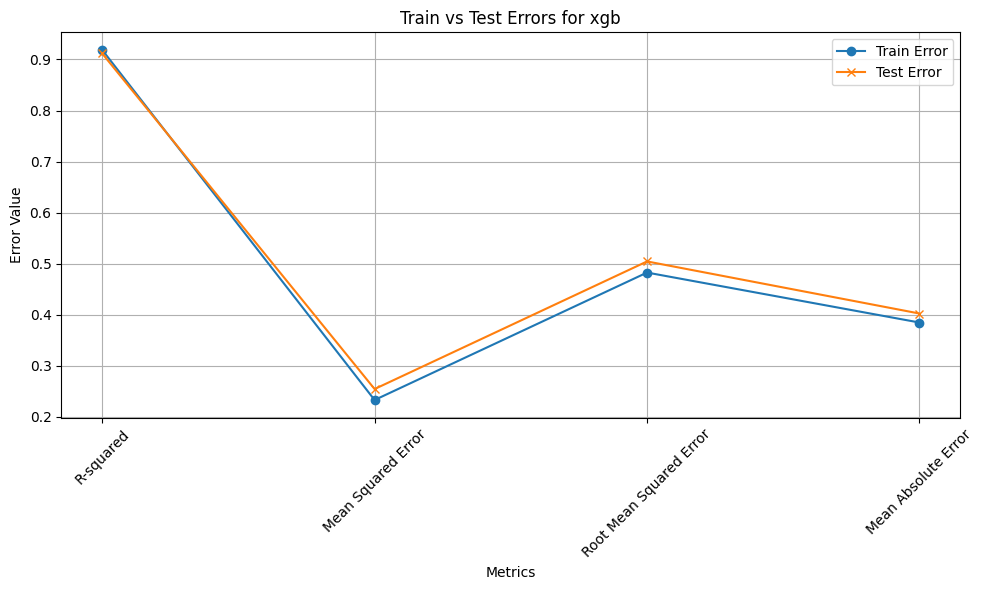

In [ ]:
# prompt: linear regression train errors vs test errors for all the four metrices

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate errors for training data
y_train_pred = xgb_model.predict(X_train)
r2_xgb_train = r2_score(y_train, y_train_pred)
mse_xgb_train = mean_squared_error(y_train, y_train_pred)
rmse_xgb_train = np.sqrt(mse_xgb_train)
mae_xgb_train = mean_absolute_error(y_train, y_train_pred)

# Store the errors in a dictionary
train_errors = {
    "R-squared": r2_xgb_train,
    "Mean Squared Error": mse_xgb_train,
    "Root Mean Squared Error": rmse_xgb_train,
    "Mean Absolute Error": mae_xgb_train
}
test_errors = {
    "R-squared": r2_xgb,
    "Mean Squared Error": mse_xgb,
    "Root Mean Squared Error": rmse_xgb,
    "Mean Absolute Error": mae_xgb
}

# Create a DataFrame for better visualization
errors_df = pd.DataFrame({"Train Error": train_errors, "Test Error": test_errors})

# Display the table
print(errors_df)

# Plotting the errors
metrics = ["R-squared", "Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error"]
plt.figure(figsize=(10, 6))
plt.plot(metrics, errors_df["Train Error"], label="Train Error", marker='o')
plt.plot(metrics, errors_df["Test Error"], label="Test Error", marker='x')
plt.xlabel("Metrics")
plt.ylabel("Error Value")
plt.title("Train vs Test Errors for xgb")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() # Prevents labels from overlapping
plt.show()

# LightGBM

In [ ]:
!pip install lightgbm


In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score, roc_curve, auc

lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 170639, number of used features: 9
[LightGBM] [Info] Start training from score 4.648910


In [ ]:
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = math.sqrt(mse_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM Mean Squared Error: {mse_lgb}")
print(f"LightGBM Root Mean Squared Error: {rmse_lgb}")
print(f"LightGBM Mean Absolute Error: {mae_lgb}")
print(f"LightGBM R-squared: {r2_lgb}")

LightGBM Mean Squared Error: 0.2501959368492244
LightGBM Root Mean Squared Error: 0.5001958984730127
LightGBM Mean Absolute Error: 0.3990515011608712
LightGBM R-squared: 0.9133695832556967


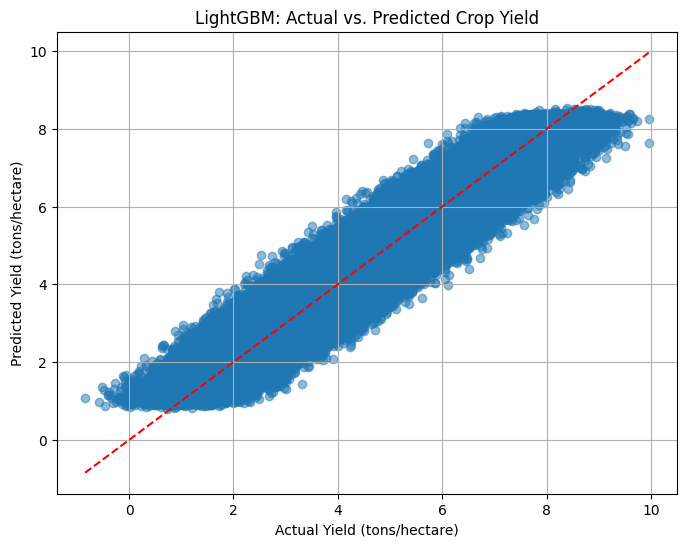

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.xlabel("Actual Yield (tons/hectare)")
plt.ylabel("Predicted Yield (tons/hectare)")
plt.title("LightGBM: Actual vs. Predicted Crop Yield")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

                         Train Error  Test Error
R-squared                   0.914545    0.913370
Mean Squared Error          0.245438    0.250196
Root Mean Squared Error     0.495417    0.500196
Mean Absolute Error         0.395106    0.399052


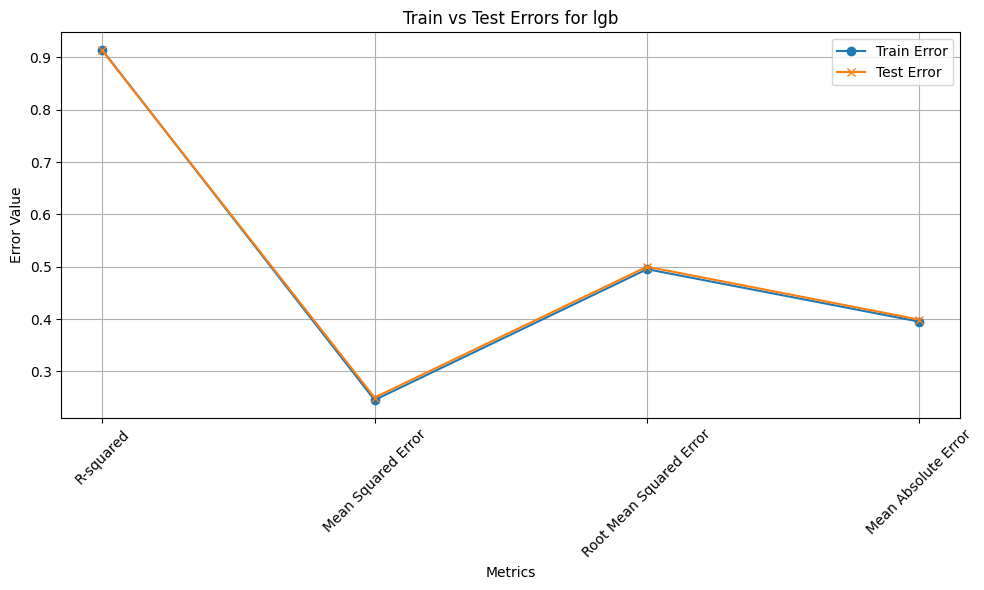

In [ ]:
# prompt: linear regression train errors vs test errors for all the four metrices

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate errors for training data
y_train_pred = lgb_model.predict(X_train)
r2_lgb_train = r2_score(y_train, y_train_pred)
mse_lgb_train = mean_squared_error(y_train, y_train_pred)
rmse_lgb_train = np.sqrt(mse_lgb_train)
mae_lgb_train = mean_absolute_error(y_train, y_train_pred)

# Store the errors in a dictionary
train_errors = {
    "R-squared": r2_lgb_train,
    "Mean Squared Error": mse_lgb_train,
    "Root Mean Squared Error": rmse_lgb_train,
    "Mean Absolute Error": mae_lgb_train
}
test_errors = {
    "R-squared": r2_lgb,
    "Mean Squared Error": mse_lgb,
    "Root Mean Squared Error": rmse_lgb,
    "Mean Absolute Error": mae_lgb
}

# Create a DataFrame for better visualization
errors_df = pd.DataFrame({"Train Error": train_errors, "Test Error": test_errors})

# Display the table
print(errors_df)

# Plotting the errors
metrics = ["R-squared", "Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error"]
plt.figure(figsize=(10, 6))
plt.plot(metrics, errors_df["Train Error"], label="Train Error", marker='o')
plt.plot(metrics, errors_df["Test Error"], label="Test Error", marker='x')
plt.xlabel("Metrics")
plt.ylabel("Error Value")
plt.title("Train vs Test Errors for lgb")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() # Prevents labels from overlapping
plt.show()

In [ ]:
# prompt: Now as we have all the train and test errors of all the algorithims simulate them in a single table

import pandas as pd

# Create a list of dictionaries to hold the data
data_rows = []


# Helper function to append data to data_rows
def append_data(model_name, r2_train, mse_train, rmse_train, mae_train, r2_test, mse_test, rmse_test, mae_test):
    data_rows.append({
        'Model': model_name,
        'Metric': 'R-squared',
        'Train Error': r2_train,
        'Test Error': r2_test
    })
    data_rows.append({
        'Model': model_name,
        'Metric': 'Mean Squared Error',
        'Train Error': mse_train,
        'Test Error': mse_test
    })
    data_rows.append({
        'Model': model_name,
        'Metric': 'Root Mean Squared Error',
        'Train Error': rmse_train,
        'Test Error': rmse_test
    })
    data_rows.append({
        'Model': model_name,
        'Metric': 'Mean Absolute Error',
        'Train Error': mae_train,
        'Test Error': mae_test
    })

# Append data for each model
append_data("Initial Model", r2_train, mse_train, rmse_train, mae_train, r2, mse, rmse, mae)
append_data("KNN", r2_knn_train, mse_knn_train, rmse_knn_train, mae_knn_train, r2_knn, mse_knn, rmse_knn, mae_knn)
append_data("Decision Tree", r2_dt_train, mse_dt_train, rmse_dt_train, mae_dt_train, r2_dt, mse_dt, rmse_dt, mae_dt)
append_data("Random Forest", r2_rf_train, mse_rf_train, rmse_rf_train, mae_rf_train, r2_rf, mse_rf, rmse_rf, mae_rf)
append_data("Gradient Boosting", r2_gb_train, mse_gb_train, rmse_gb_train, mae_gb_train, r2_gb, mse_gb, rmse_gb, mae_gb)
append_data("XGBoost", r2_xgb_train, mse_xgb_train, rmse_xgb_train, mae_xgb_train, r2_xgb, mse_xgb, rmse_xgb, mae_xgb)
append_data("LightGBM", r2_lgb_train, mse_lgb_train, rmse_lgb_train, mae_lgb_train, r2_lgb, mse_lgb, rmse_lgb, mae_lgb)

# Create the DataFrame
error_comparison_df = pd.DataFrame(data_rows)

# Display the DataFrame
error_comparison_df

,Model,Metric,Train Error,Test Error
0,Initial Model,R-squared,0.913158,0.913718
1,Initial Model,Mean Squared Error,0.249422,0.249189
2,Initial Model,Root Mean Squared Error,0.499421,0.499188
3,Initial Model,Mean Absolute Error,0.398316,0.398232
4,KNN,R-squared,0.921846,0.883140
5,KNN,Mean Squared Error,0.224468,0.337500
6,KNN,Root Mean Squared Error,0.473781,0.580948
7,KNN,Mean Absolute Error,0.378235,0.463938
8,Decision Tree,R-squared,0.916172,0.910054
9,Decision Tree,Mean Squared Error,0.240763,0.259772


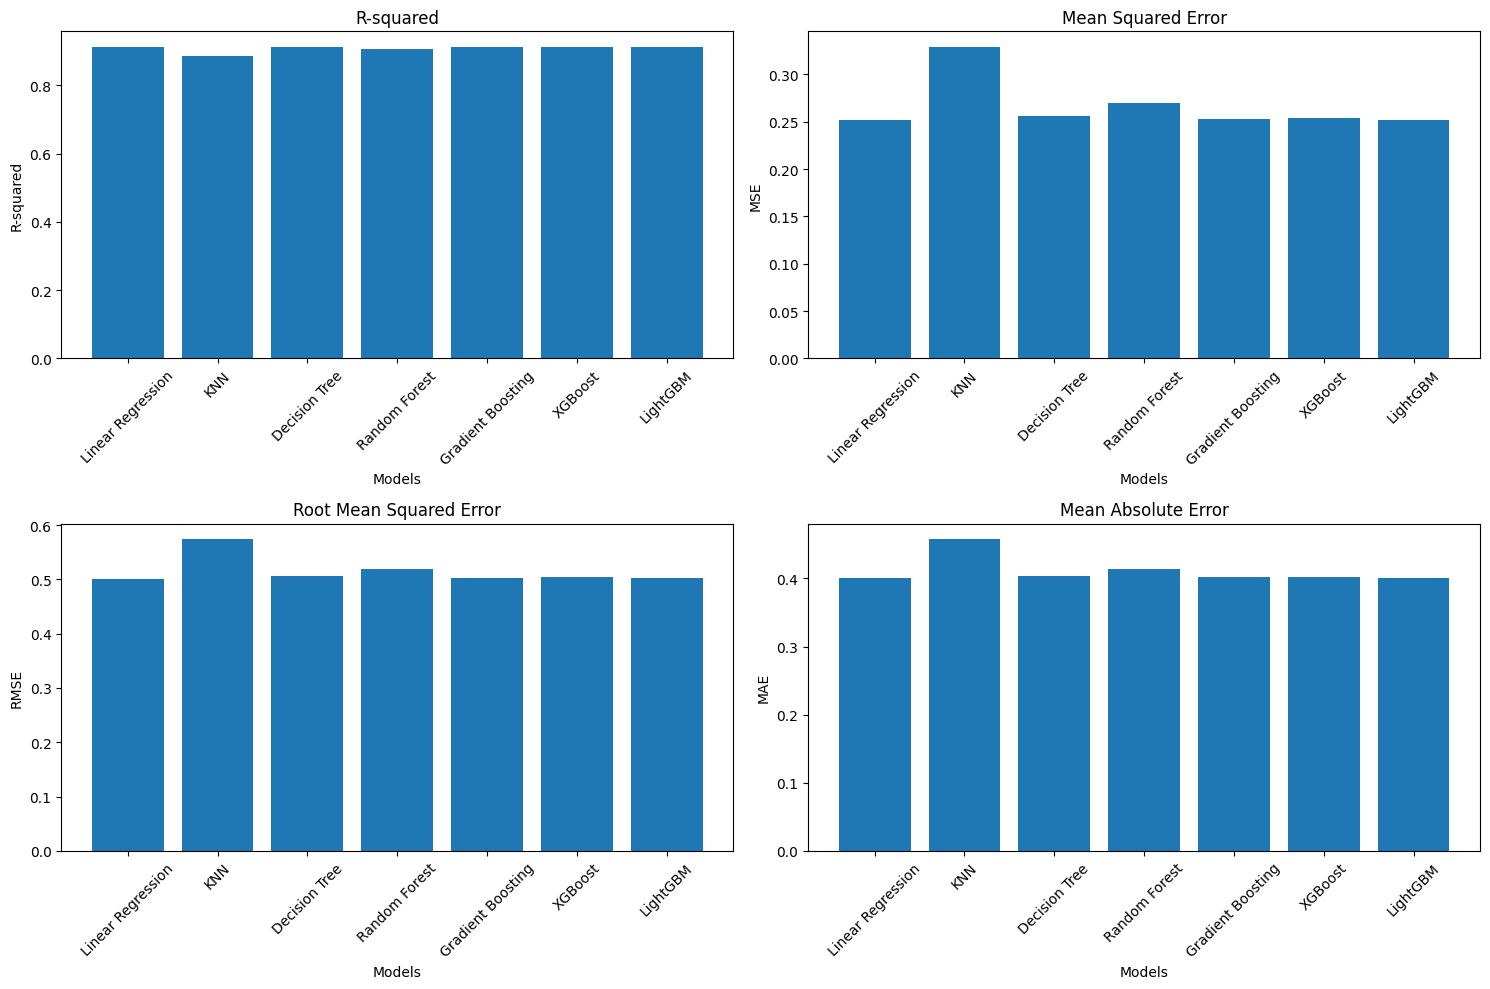

In [ ]:

import matplotlib.pyplot as plt

models = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']
r2_scores = [r2, r2_knn, r2_dt, r2_rf, r2_gb, r2_xgb, r2_lgb]
mse_scores = [mse, mse_knn, mse_dt, mse_rf, mse_gb, mse_xgb, mse_lgb]
rmse_scores = [rmse, rmse_knn, rmse_dt, rmse_rf, rmse_gb, rmse_xgb, rmse_lgb]
mae_scores = [mae, mae_knn, mae_dt, mae_rf, mae_gb, mae_xgb, mae_lgb]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes[0, 0].bar(models, r2_scores)
axes[0, 0].set_title('R-squared')
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('R-squared')
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(models, mse_scores)
axes[0, 1].set_title('Mean Squared Error')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=45)

axes[1, 0].bar(models, rmse_scores)
axes[1, 0].set_title('Root Mean Squared Error')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].bar(models, mae_scores)
axes[1, 1].set_title('Mean Absolute Error')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('MAE')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

In [ ]:
import math
import pandas as pd

models = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']
r2_scores = [r2, r2_knn, r2_dt, r2_rf, r2_gb, r2_xgb, r2_lgb]
mse_scores = [mse, mse_knn, mse_dt, mse_rf, mse_gb, mse_xgb, mse_lgb]
rmse_scores = [rmse, rmse_knn, rmse_dt, rmse_rf, rmse_gb, rmse_xgb, rmse_lgb]
mae_scores = [mae, mae_knn, mae_dt, mae_rf, mae_gb, mae_xgb, mae_lgb]

data = {'Model': models,
        'R-squared': r2_scores,
        'MSE': mse_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores}

df = pd.DataFrame(data)
df

,Model,R-squared,MSE,RMSE,MAE
0,Linear Regression,0.912636,0.251415,0.501413,0.399990
1,KNN,0.885677,0.328996,0.573582,0.457183
2,Decision Tree,0.910972,0.256203,0.506165,0.403765
3,Random Forest,0.906411,0.269330,0.518970,0.414070
4,Gradient Boosting,0.912042,0.253126,0.503116,0.401353
5,XGBoost,0.911836,0.253717,0.503703,0.401997
6,LightGBM,0.912410,0.252066,0.502061,0.400570


In [ ]:
import pandas as pd

models = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']
r2_scores = [r2, r2_knn, r2_dt, r2_rf, r2_gb, r2_xgb, r2_lgb]
mse_scores = [mse, mse_knn, mse_dt, mse_rf, mse_gb, mse_xgb, mse_lgb]
rmse_scores = [rmse, rmse_knn, rmse_dt, rmse_rf, rmse_gb, rmse_xgb, rmse_lgb]
mae_scores = [mae, mae_knn, mae_dt, mae_rf, mae_gb, mae_xgb, mae_lgb]

data = {'Model': models,
        'R-squared': r2_scores,
        'MSE': mse_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores}

df = pd.DataFrame(data)

best_r2_model = df.loc[df['R-squared'].idxmax()]

best_mse_model = df.loc[df['MSE'].idxmin()]
best_rmse_model = df.loc[df['RMSE'].idxmin()]
best_mae_model = df.loc[df['MAE'].idxmin()]

print("Model with the best R-squared:")
print(best_r2_model)

print("\nModel with the lowest MSE:")
print(best_mse_model)

print("\nModel with the lowest RMSE:")
print(best_rmse_model)

print("\nModel with the lowest MAE:")
best_mae_model

Model with the best R-squared:
Model        Linear Regression
R-squared             0.912636
MSE                   0.251415
RMSE                  0.501413
MAE                    0.39999
Name: 0, dtype: object

Model with the lowest MSE:
Model        Linear Regression
R-squared             0.912636
MSE                   0.251415
RMSE                  0.501413
MAE                    0.39999
Name: 0, dtype: object

Model with the lowest RMSE:
Model        Linear Regression
R-squared             0.912636
MSE                   0.251415
RMSE                  0.501413
MAE                    0.39999
Name: 0, dtype: object

Model with the lowest MAE:


,0
Model,Linear Regression
R-squared,0.912636
MSE,0.251415
RMSE,0.501413
MAE,0.39999


#**Why Linear Regression is the Best:**
**Evaluation of Metrics:
Highest R-squared (R²):**

Linear Regression has the highest R² value of 0.912636, indicating it explains 91.26% of the variance in the target variable, which is slightly better than the other models.
Lowest MSE:

Linear Regression has the lowest Mean Squared Error (MSE) of 0.251415, indicating it makes the smallest average squared errors.
Competitive RMSE and MAE:

Its RMSE (0.501413) and MAE (0.399990) are also the lowest among all models, showing it has the least prediction errors both in squared terms and absolute terms.

**Simplicity and interpretability:** Linear Regression is simpler than advanced methods like Gradient Boosting or XGBoost, making it more interpretable without sacrificing performance.

# Main functions used in the notebook:


**Data Loading and Preprocessing:**


 pd.read_csv(): Reads the CSV file into a Pandas DataFrame.

 data.dropna(): Handles missing values by removing rows with NaN values.

 data.select_dtypes(): Selects columns based on their data type.

 LabelEncoder(): Encodes categorical features into numerical representations.

 StandardScaler(): Standardizes numerical features.


**Data Exploration and Visualization:**

 data.shape: Gets the dimensions of the DataFrame.

 data.info(): Displays information about the DataFrame (data types, missing values).

 data.head(): Shows the first few rows of the DataFrame.

 sns.histplot(): Creates a histogram of a numerical feature.

 sns.scatterplot(): Creates a scatter plot between two numerical features.


**Model Training and Evaluation:**

 train_test_split(): Splits the data into training and testing sets.

 LinearRegression(): Trains a linear regression model.

 KNeighborsRegressor(): Trains a K-Nearest Neighbors regressor.

 DecisionTreeRegressor(): Trains a decision tree regressor.

 RandomForestRegressor(): Trains a random forest regressor.

 GradientBoostingRegressor(): Trains a gradient boosting regressor.

 xgb.XGBRegressor(): Trains an XGBoost regressor.

 lgb.LGBMRegressor(): Trains a LightGBM regressor.

 model.fit(): Trains the model on the training data.

 model.predict(): Makes predictions on the test data.

 r2_score(): Calculates the R-squared score.

 mean_squared_error(): Calculates the mean squared error.

 mean_absolute_error(): Calculates the mean absolute error.

 math.sqrt(): Calculates the square root (used for RMSE).

 plt.scatter(): Creates a scatter plot.

 plt.plot(): Creates a line plot.

 pd.DataFrame(): Creates a pandas DataFrame.


**Other:**

 print(): Prints output to the console.